各阶数下的参数均值：
       single_gate    two_gate   total_gate        depth       latency
order                                                                 
0         0.000000    0.000000     0.000000     0.000000      0.000000
1         0.250000    0.750000     1.000000     1.000000     20.000000
2        25.000000    5.375000    30.375000    16.125000     89.750000
3       168.545455   33.818182   202.363636    78.909091    572.909091
4       796.979167  151.020833   948.000000   387.208333   2809.708333
5      3230.200000  597.800000  3828.000000  1750.500000  12823.700000


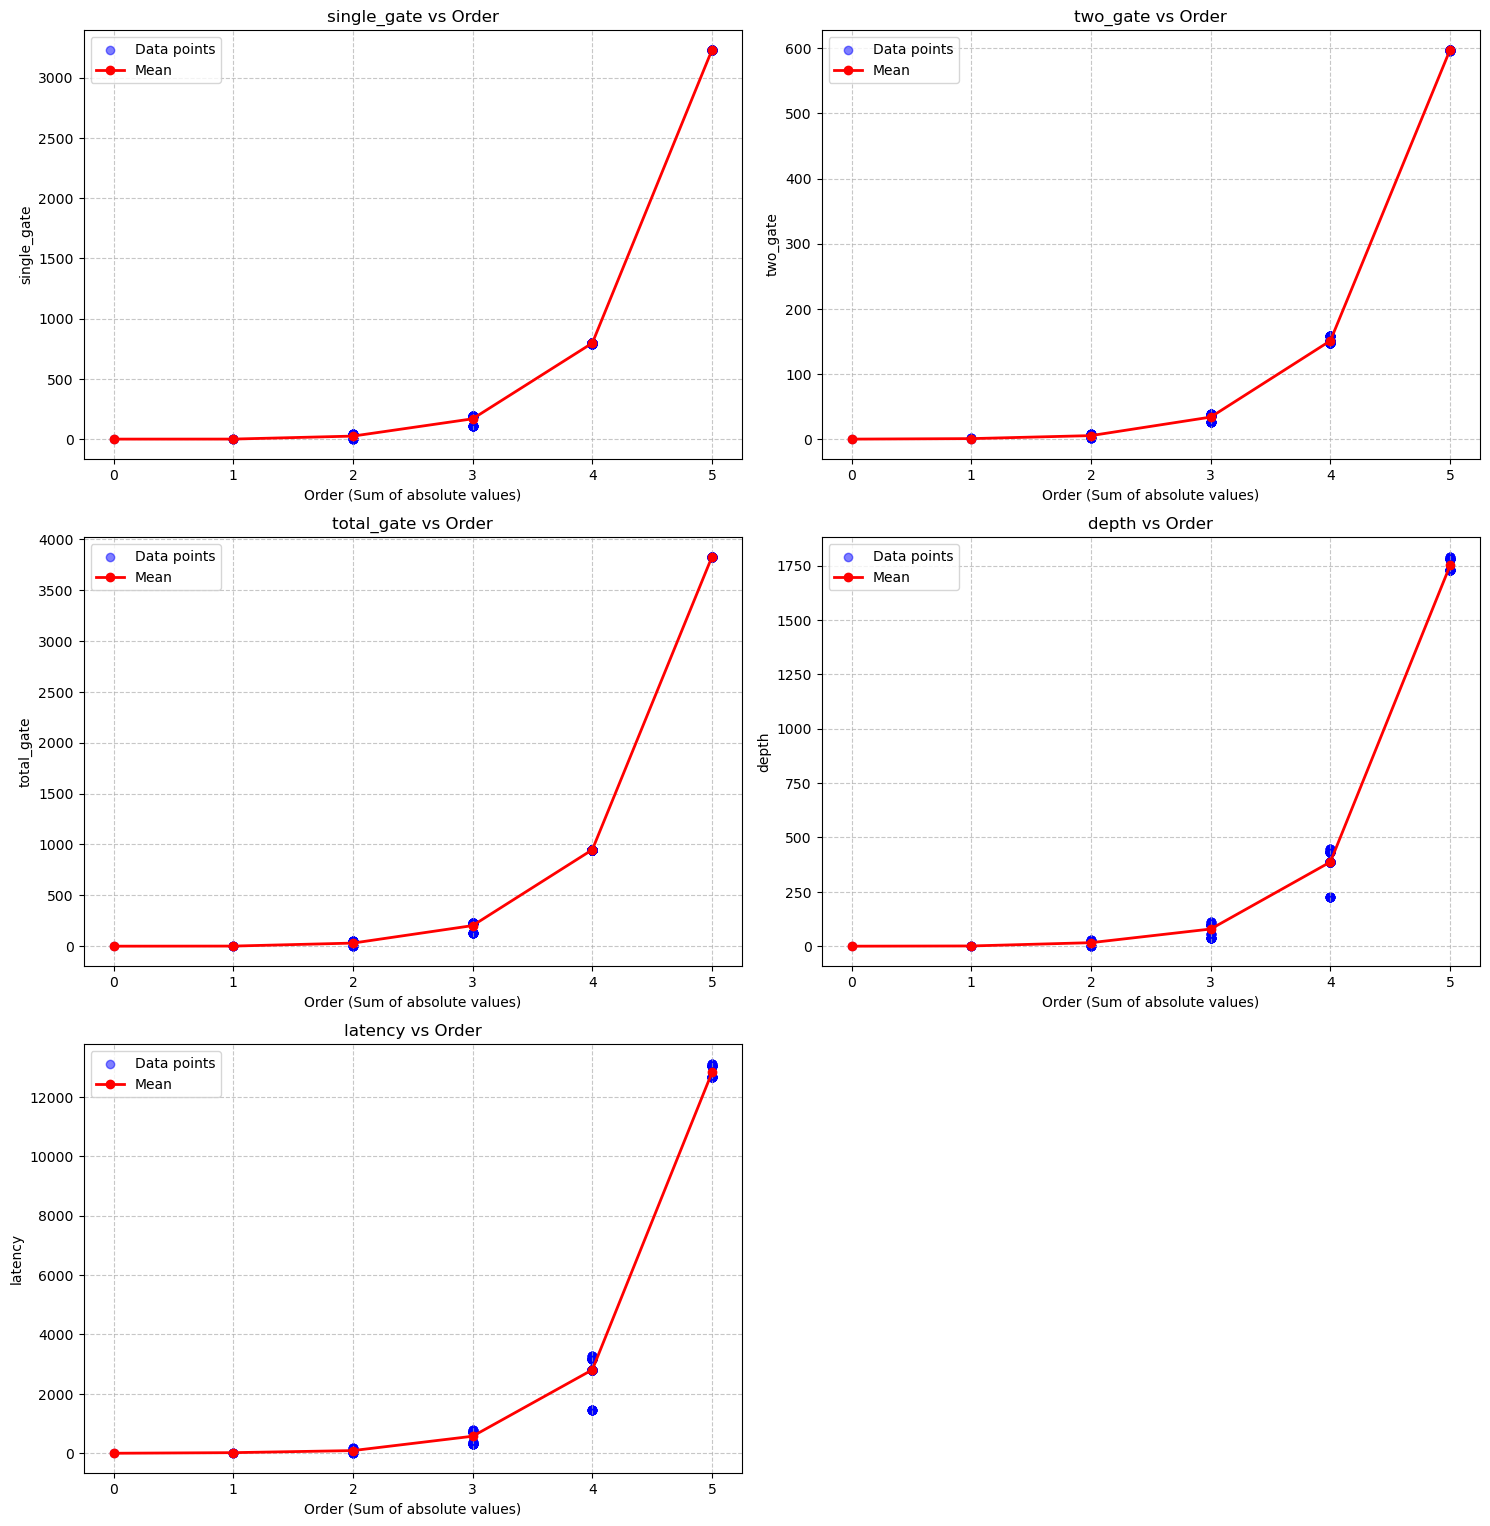

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# 1. 读取数据
# 请确保 CSV 文件在当前目录下，或者修改为正确的文件路径
df = pd.read_csv('result_logic_[abcd].csv')

# 清理列名（去除可能存在的首尾空格）
df.columns = df.columns.str.strip()

# 2. 定义计算阶数的函数
def calculate_order(k_str):
    """
    从字符串 K=[abcd] 中提取数字并计算绝对值之和。
    例如: [-1-0-1-0] -> |(-1)| + |0| + |(-1)| + |0| = 2
    """
    # 使用正则表达式查找所有带符号的整数
    matches = re.findall(r'[+-]\d+', k_str)
    if len(matches) != 4:
        return None
    numbers = [int(m) for m in matches]
    # 阶数 = 绝对值之和
    return sum(abs(n) for n in numbers)

# 3. 应用函数计算每一行的阶数
df['order'] = df['K=[abcd]'].apply(calculate_order)

# 4. 分组统计
# 选择需要分析的数值型列
metrics = ['single_gate', 'two_gate', 'total_gate', 'depth', 'latency']
# 按阶数分组并计算均值
grouped = df.groupby('order')[metrics].mean()

print("各阶数下的参数均值：")
print(grouped)

# (可选) 将统计结果保存为 CSV
grouped.to_csv('grouped_analysis.csv')

# 5. 绘图分析
# 设置画布大小：4行2列
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # 绘制原始数据散点（蓝色）
    ax.scatter(df['order'], df[metric], alpha=0.5, label='Data points', color='blue')
    
    # 绘制均值曲线（红色）
    ax.plot(grouped.index, grouped[metric], color='red', linewidth=2, label='Mean', marker='o')
    
    # 设置标题和标签
    ax.set_title(f'{metric} vs Order')
    ax.set_xlabel('Order (Sum of absolute values)')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# 移除多余的空子图（因为只有7个参数，画布有8个位置）
if len(metrics) < len(axes):
    for j in range(len(metrics), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
# 保存图片
plt.savefig('order_analysis.png')
plt.show()